In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [418]:
dataset = pd.read_csv("CarPrice.csv")

In [419]:
dataset.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [420]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [421]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [422]:
print(dataset.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [423]:
X = dataset.drop("price", axis=1)
y = dataset["price"]

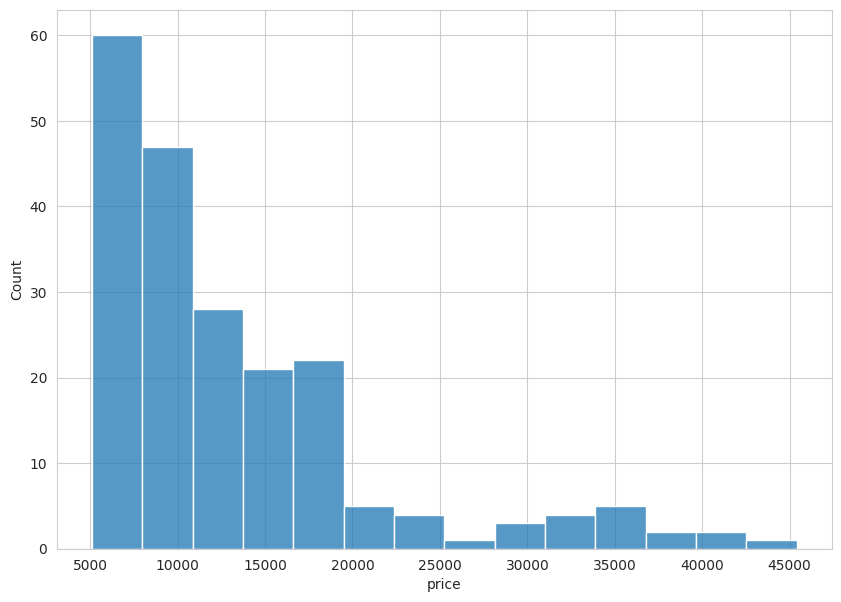

In [424]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.histplot(dataset.price)
plt.show()

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [426]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 90 to 102
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            153 non-null    int64  
 1   symboling         153 non-null    int64  
 2   CarName           153 non-null    object 
 3   fueltype          153 non-null    object 
 4   aspiration        153 non-null    object 
 5   doornumber        153 non-null    object 
 6   carbody           153 non-null    object 
 7   drivewheel        153 non-null    object 
 8   enginelocation    153 non-null    object 
 9   wheelbase         153 non-null    float64
 10  carlength         153 non-null    float64
 11  carwidth          153 non-null    float64
 12  carheight         153 non-null    float64
 13  curbweight        153 non-null    int64  
 14  enginetype        153 non-null    object 
 15  cylindernumber    153 non-null    object 
 16  enginesize        153 non-null    int64  
 17  f

In [427]:
dataset.drop(["car_ID", "symboling"], axis=1, inplace=True)

In [428]:
drop_columns = ['aspiration', 'fueltype','doornumber', 'carbody', 'drivewheel', 'enginelocation',
                'enginetype', 'cylindernumber', 'fuelsystem']
dataset.drop(columns=drop_columns, inplace=True)


In [429]:
X_train["CarName"].value_counts()

CarName
peugeot 504                  5
toyota corona                4
toyota corolla               4
subaru dl                    3
mazda glc deluxe             2
                            ..
dodge challenger se          1
mazda glc custom             1
peugeot 505s turbo diesel    1
honda civic 1500 gl          1
nissan fuga                  1
Name: count, Length: 119, dtype: int64

In [430]:
X_train["Manufacturer"] = X_train["CarName"].apply(lambda x: x.split(" ")[0])
X_test["Manufacturer"] = X_test["CarName"].apply(lambda x: x.split(" ")[0])

<ipython-input-431-ce9bf8f68148>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Manufacturer', data=X_train, palette='Set1')  # Set1 palette for different colors


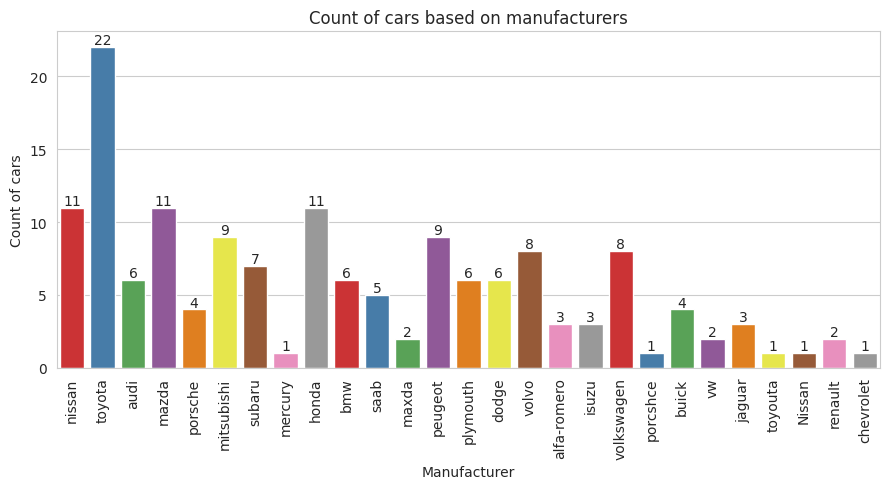

In [431]:
plt.figure(figsize=(9, 5))
plot = sns.countplot(x='Manufacturer', data=X_train, palette='Set1')  # Set1 palette for different colors

plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.tight_layout()
plt.show()


In [432]:
X_train.drop("CarName", axis=1, inplace=True)
X_test.drop("CarName", axis=1, inplace=True)

In [433]:
dataset.drop(columns='CarName', inplace=True)

In [434]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [435]:
print(dataset.corr())

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.5440

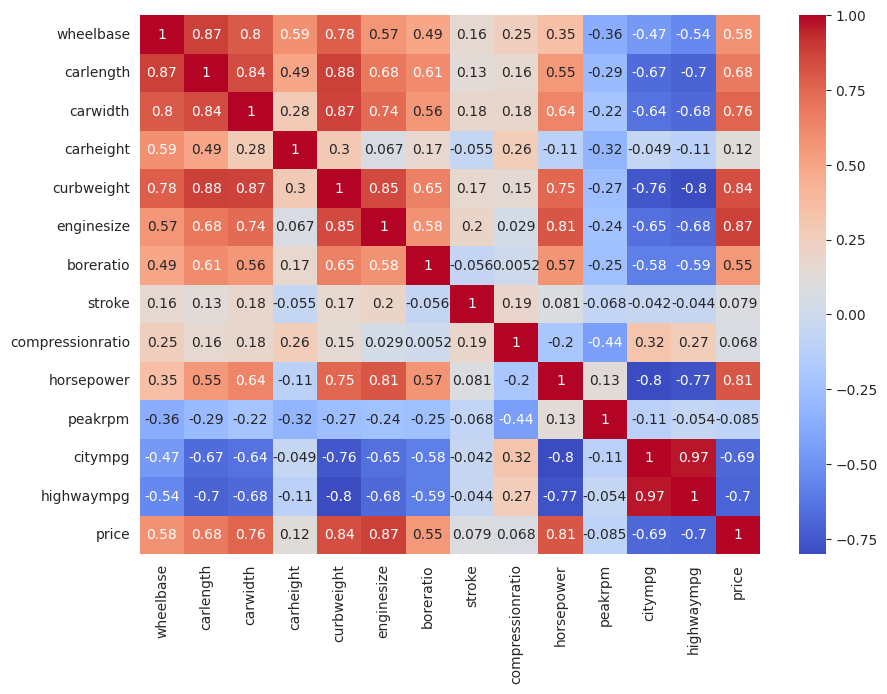

In [436]:
plt.figure(figsize=(10, 7))
correlations = dataset.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


In [437]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [438]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [439]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [440]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [441]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0

In [442]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_lr = linear_reg.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R2 Score: {r2_lr}")


Linear Regression R2 Score: 0.8400516367067432


In [443]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R2 Score: {r2_rf}")


Random Forest R2 Score: 0.9427000054325136
